In [250]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [251]:
cl = 'annotation.tsv'
df_ann = pd.read_csv(cl, sep='\t', index_col=1)
ENST = df_ann[['CD44' in s for s in df_ann['Gene name']]].index.tolist()
CD44 = df_ann[['CD44' in s for s in df_ann['Gene name']]].loc[:, 'Transcript name']
iso = ['S3', 'S11', 'S7', 'S16', 'S5', 'S6', 'S1']

In [252]:
zeros = [0]*7
TPM_arr = pd.DataFrame(zeros, index=ENST, columns=['Example'])
TPM_arr.head()

,Example
ENST00000428726,0
ENST00000415148,0
ENST00000433892,0
ENST00000263398,0
ENST00000278386,0


In [253]:
def iso_check(tbl, j):
    tbl.index = tbl.index.map(lambda x: str(x)[:15]) # cut last digits
    result = tbl.query('Name in @ENST') # choose certain rows
    TPM = result.loc[:, 'TPM']
    TPM_arr[iso[j]] = TPM

In [254]:
cwd = os.getcwd()
j = 0

for file in os.listdir(cwd):
    filename = os.fsdecode(file)
    if filename.endswith('.tsv') and filename != 'annotation.tsv': 
        tsv =  filename
        table = pd.read_csv(tsv, sep='\t', index_col=0)
        iso_check(table, j)
        j+=1
        continue

In [259]:
TPM_arr['Transcript'] = CD44
transcript = (TPM_arr.loc[:, 'Transcript'].to_list())*7
TPM_arr = TPM_arr.drop('Transcript', axis=1)
TPM_arr = TPM_arr.drop('Example', axis=1)
TPM_arr.head()

,S3,S11,S7,S16,S5,S6,S1
ENST00000428726,16.449133,28.474903,28.812483,8.622146,34.346007,8.007016,15.750429
ENST00000415148,2.952636,11.724962,13.956879,1.456141,5.577307,5.504699,23.752839
ENST00000433892,93.564843,110.849820,144.753659,30.988690,108.291728,88.510799,125.510647
ENST00000263398,55.511174,55.800655,60.899102,20.511373,57.806818,26.138662,45.320655
ENST00000278386,0.577544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [260]:
TPM_arr_plot = pd.melt(TPM_arr)
TPM_arr_plot = TPM_arr_plot.rename(columns={"variable": "Sample", "value": "TPM"})
isoform = (TPM_arr.index.tolist())*7
TPM_arr_plot['Isoforms'] = isoform
TPM_arr_plot['Transcript'] = transcript

TPM_arr_plot.head()

,Sample,TPM,Isoforms,Transcript
0,S3,16.449133,ENST00000428726,CD44-208
1,S3,2.952636,ENST00000415148,CD44-206
2,S3,93.564843,ENST00000433892,CD44-209
3,S3,55.511174,ENST00000263398,CD44-201
4,S3,0.577544,ENST00000278386,CD44-203


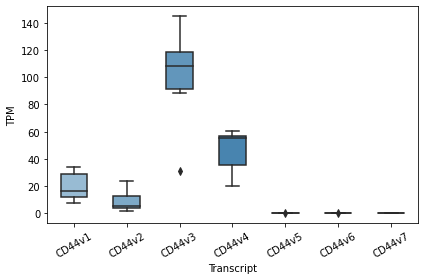

In [276]:
plot = sns.boxplot(y='TPM', x='Transcript', 
                 data=TPM_arr_plot, 
                 width=0.5,
                 palette="Blues_d")
plot.set_xticklabels(labels=['CD44v1', 'CD44v2', 'CD44v3', 'CD44v4', 'CD44v5', 'CD44v6','CD44v7'], rotation=30)
plt.tight_layout()

In [277]:
plot.get_figure().savefig('samples_TPM.png', dpi=300)